In [29]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
data = pd.read_csv(url, sep="\s+", header=None, names=["Area", "Perimeter", "Compactness", "Length of kernel", "Width of kernel", "Asymmetry coefficient", "Length of kernel groove", "Label"])

X = data.drop("Label", axis=1).values
y = data["Label"].values

In [30]:
import numpy as np

def pca(X, n_components=2):
    # Standardize the data
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_standardized = (X - X_mean) / X_std

    # Compute the covariance matrix
    cov_matrix = np.cov(X_standardized.T)

    # Compute eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvalues and corresponding eigenvectors
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    # Select the top n_components eigenvectors
    eigenvectors_selected = sorted_eigenvectors[:, :n_components]

    # Project the data onto the n_components-dimensional subspace
    projected_data = np.dot(X_standardized, eigenvectors_selected)

    return projected_data

In [31]:
pca_data = pca(X)

In [32]:
pca_data

array([[ 3.17047052e-01, -7.83669015e-01],
       [-3.38617773e-03, -1.91321367e+00],
       [-4.59443341e-01, -1.90722525e+00],
       [-5.91935651e-01, -1.93106922e+00],
       [ 1.10291005e+00, -2.06809003e+00],
       [-3.36815150e-01, -1.63691626e+00],
       [-1.45602498e-01, -4.36414570e-01],
       [-4.25439933e-01, -1.39015330e+00],
       [ 1.76718434e+00, -3.07528830e-01],
       [ 1.44119415e+00, -1.01106830e+00],
       [ 6.71107449e-02,  4.29312461e-01],
       [-5.72683493e-01, -1.55824408e+00],
       [-9.31414541e-01, -8.73925640e-01],
       [-9.14882766e-01, -8.71940034e-01],
       [-1.00836149e+00, -9.58530316e-01],
       [-5.15522337e-01, -1.05872649e+00],
       [-7.84530515e-01, -1.14197655e+00],
       [ 6.79029059e-01, -2.17036180e+00],
       [-2.34416607e-01, -2.78779387e+00],
       [-1.73767215e+00, -3.40140568e-01],
       [-5.61482567e-01, -1.58659628e-01],
       [-4.77524312e-01, -7.04746626e-01],
       [ 8.57383186e-01, -2.32117455e+00],
       [-1.

In [34]:
import random

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def kmeans(X, k=3, num_iterations=100):
    # Initialize random centroids
    centroid_indices = random.sample(range(X.shape[0]), k)
    centroids = X[centroid_indices]

    # Initialize predicted labels array
    predicted_labels = np.empty(X.shape[0], dtype=int)

    for _ in range(num_iterations):
        # Assign each data point to the closest centroid and update the predicted labels
        clusters = {i: [] for i in range(k)}
        for index, x in enumerate(X):
            closest_centroid = np.argmin([euclidean_distance(x, centroid) for centroid in centroids])
            clusters[closest_centroid].append(x)
            predicted_labels[index] = closest_centroid

        # Update centroids
        new_centroids = []
        for i in range(k):
            new_centroid = np.mean(clusters[i], axis=0)
            new_centroids.append(new_centroid)
        centroids = np.array(new_centroids)

    return [centroids, clusters, predicted_labels]

def kmeans1(X, k=3, num_iterations=100):
    # Initialize random centroids
    centroid_indices = random.sample(range(X.shape[0]), k)
    centroids = X[centroid_indices]

    # Initialize predicted labels array
    predicted_labels = np.empty(X.shape[0], dtype=int)

    for _ in range(num_iterations):
        # Assign each data point to the closest centroid and update the predicted labels
        clusters = {i: [] for i in range(k)}
        for index, x in enumerate(X):
            closest_centroid = np.argmin([euclidean_distance(x, centroid) for centroid in centroids])
            clusters[closest_centroid].append(x)
            predicted_labels[index] = closest_centroid

        # Update centroids
        new_centroids = []
        for i in range(k):
            new_centroid = np.mean(clusters[i], axis=0)
            new_centroids.append(new_centroid)
        centroids = np.array(new_centroids)

    return centroids, clusters, predicted_labels

In [35]:
results = kmeans(pca_data)

In [36]:
print(results[0])

[[-2.32481421  0.5689108 ]
 [ 2.80525792  0.41690012]
 [-0.23066709 -1.01495227]]


In [37]:
print(results[1])

{0: [array([-1.73767215, -0.34014057]), array([-1.55728246, -0.55513401]), array([-1.69804238, -0.75045017]), array([-2.40035654, -1.26466877]), array([-2.7498493 , -1.33727587]), array([-2.63075608, -1.89677793]), array([-1.25753988, -0.0722934 ]), array([-1.79081064,  0.16750606]), array([-1.3502774 ,  1.22421437]), array([-1.0935028 ,  1.79884796]), array([-1.24605922,  1.11345738]), array([-1.90077852,  0.62945125]), array([-2.46609342,  1.07017952]), array([-2.97143253,  2.185082  ]), array([-2.60278034, -0.24480326]), array([-1.85372955, -0.02182832]), array([-1.54356722,  0.13056009]), array([-3.19043461,  1.93260252]), array([-2.19323497,  0.96296605]), array([-2.46649392,  2.45412598]), array([-1.98604045,  1.25734679]), array([-2.93170345,  0.36074995]), array([-2.58611808,  0.60623764]), array([-2.95816928,  1.76367282]), array([-2.55747836, -0.50693   ]), array([-2.48852395,  1.77621293]), array([-2.53931671,  1.65660094]), array([-2.66265839,  1.64078819]), array([-1.48138

In [38]:
print(results[2])

[2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0]


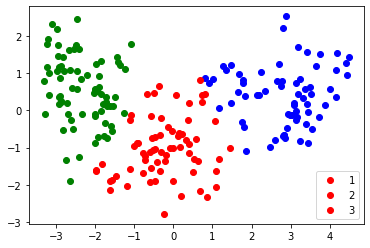

In [52]:
import matplotlib.pyplot as plt
color = ['green', 'blue','red']
for i in range(210):
    j  = results[2][i]
    col = color[j]
    plt.scatter(pca_data[:,0][i],pca_data[:,1][i],color = col)
plt.legend(["1","2","3"])
plt.show()

In [47]:
pca_data[:,0][0]

0.3170470518544717

In [11]:
def rand_index(clusters, predicted_labels, true_labels):
    n = len(true_labels)
    a = 0
    b = 0

    # Compute the number of pairs with same/different labels in true_labels and predicted_labels
    for i in range(n):
        for j in range(i+1, n):
            if true_labels[i] == true_labels[j] and predicted_labels[i] == predicted_labels[j]:
                a += 1
            elif true_labels[i] != true_labels[j] and predicted_labels[i] != predicted_labels[j]:
                b += 1

    rand_index = (a + b) / (n * (n - 1) // 2)
    return rand_index

In [18]:
def silhouette_coefficient(X, clusters, centroids):
    def average_distance(x, cluster):
        return np.mean([euclidean_distance(x, other_x) for other_x in cluster])

    silhouettes = []
    for i, cluster in clusters.items():
        for x in cluster:
            a = average_distance(x, cluster)
            b = min([average_distance(x, clusters[j]) for j in range(len(centroids)) if j != i])
            silhouette = (b - a) / max(a, b)
            silhouettes.append(silhouette)
    silhouette_coefficient = np.mean(silhouettes)
    return silhouette_coefficient

In [54]:
centroids, clusters, predicted_labels = kmeans1(pca_data)
sil_coef = silhouette_coefficient(pca_data, clusters, centroids)
rand_idx = rand_index(clusters, predicted_labels, y)
print("Silhouette Coefficient of pca data:", sil_coef)
print("Rand Index of pca data:", rand_idx)

Silhouette Coefficient of pca data: 0.5006380125112724
Rand Index of pca data: 0.9048986101617681


In [55]:
res = kmeans(X)
centroids, clusters, predicted_labels = kmeans1(X)

In [56]:
sil_coef = silhouette_coefficient(X, clusters, centroids)
print("Silhouette Coefficient of original data:", sil_coef)
rand_idx = rand_index(clusters, predicted_labels, y)
print("Rand Index of original data:", rand_idx)

Silhouette Coefficient of original data: 0.47943599429227485
Rand Index of original data: 0.8743677375256322
